In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import itertools as it
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [200]:
# the data set of people suffering from diabete, M (1 - ill, 0 - not ill)
# this dataset will be used as the train ds while modelling
pop=pd.read_csv('diabete_population.csv')
pop

,grossesses,glucose,pression,insuline,imc,K,age,M
0,2,104,75,28,39.020106,0.145273,35,1
1,10,121,64,517,30.672607,0.154211,43,1
2,2,153,59,87,26.295668,1.029407,22,1
3,9,145,47,226,46.077807,0.086713,37,1
4,3,102,76,315,28.335339,0.109751,21,1
...,...,...,...,...,...,...,...,...
395,4,76,57,45,20.185696,0.561423,22,0
396,1,71,54,25,21.455584,0.178945,22,0
397,1,120,81,189,20.183143,0.142215,22,0
398,1,78,66,139,21.339371,0.137162,25,0


In [201]:
# describe dataset, it needs to be standardized
pop.loc[:,pop.columns!='M'].describe()

,grossesses,glucose,pression,insuline,imc,K,age
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,3.820000,107.422500,72.15250,155.992500,31.853995,0.427129,30.780000
std,3.526854,31.304535,16.42021,140.449859,9.642392,0.425077,12.612863
min,0.000000,45.000000,27.00000,14.000000,18.217352,0.078656,21.000000
25%,1.000000,85.000000,60.00000,45.000000,21.561065,0.137473,22.000000
50%,3.000000,105.000000,74.00000,127.500000,31.839371,0.198598,24.000000
75%,6.000000,125.000000,84.00000,218.000000,39.107978,0.666726,38.250000
max,14.000000,190.000000,116.00000,758.000000,55.421694,2.278046,71.000000


In [202]:
# standardize the dataset and transform into X,Y
object=StandardScaler()
X_train=object.fit_transform(pop.loc[:,pop.columns!='M'])
X_train_cols=pop.loc[:,pop.columns!='M'].columns
Y_train=pop['M']

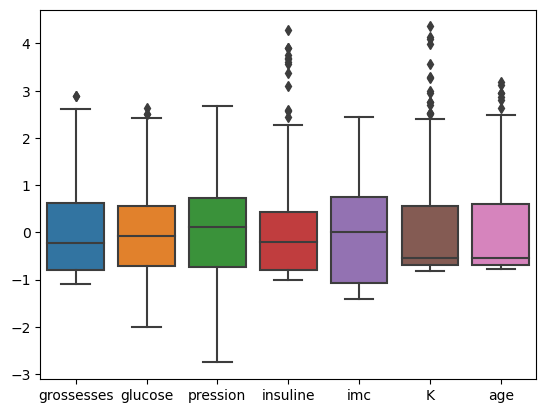

In [203]:
# EDA of the dataset
sns.boxplot(data=X_train)
plt.xticks(np.arange(0,7,step=1), X_train_cols)
plt.show()

In [204]:
# the test dataset of the patients to make predictions whether they're ill or not
# by using the train dataset (pop)
pat=pd.read_csv('diabete_patients.csv')

In [205]:
# describe dataset, it needs to be standardized
pat.loc[:,pop.columns!='M'].describe()

,grossesses,glucose,pression,insuline,imc,K,age
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.330000,114.13000,74.340000,131.350000,33.222359,0.366910,33.630000
std,3.203707,31.58847,16.508473,121.152744,9.011563,0.359159,15.206096
min,0.000000,47.00000,27.000000,14.000000,18.451867,0.080688,21.000000
25%,1.000000,97.00000,62.750000,44.750000,25.679550,0.126381,22.000000
50%,2.500000,109.50000,77.500000,81.500000,33.692327,0.185884,25.000000
75%,6.000000,136.25000,87.250000,181.250000,39.694369,0.505816,43.250000
max,13.000000,189.00000,113.000000,611.000000,53.700987,1.907907,76.000000


In [206]:
# standardize the dataset and transform into X,Y
X_test=object.fit_transform(pat.loc[:,pat.columns!='M'])
X_test_cols=pat.loc[:,pat.columns!='M'].columns
Y_test=pat['M']

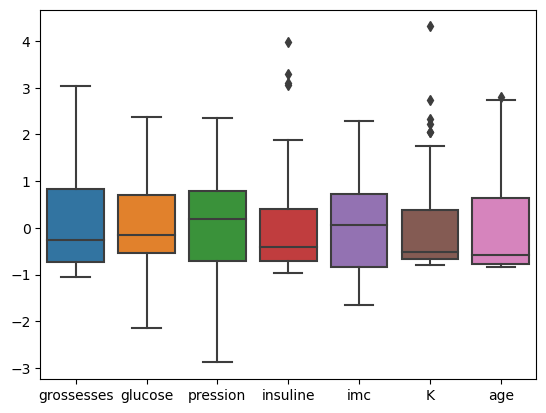

In [207]:
# EDA of the dataset
sns.boxplot(data=X_test)
plt.xticks(np.arange(0,7,step=1), X_test_cols)
plt.show()

In [208]:
# my goal is to define a set of features that contribute the most to the model
# for this I'll do it both manually and then by utilizing SelectKBest
# there are 120 variations of different comninations of the features
# these combinations I'll use further to find the best one
col_combs=[]
for i in range(2,8):
    col_combs.append(list(it.combinations(X_test_cols,i)))
merged_col_combs=(list(itertools.chain.from_iterable(combs)))
print(len(merged_col_combs))
print(merged_col_combs)

120
[('grossesses', 'glucose'), ('grossesses', 'pression'), ('grossesses', 'insuline'), ('grossesses', 'imc'), ('grossesses', 'K'), ('grossesses', 'age'), ('glucose', 'pression'), ('glucose', 'insuline'), ('glucose', 'imc'), ('glucose', 'K'), ('glucose', 'age'), ('pression', 'insuline'), ('pression', 'imc'), ('pression', 'K'), ('pression', 'age'), ('insuline', 'imc'), ('insuline', 'K'), ('insuline', 'age'), ('imc', 'K'), ('imc', 'age'), ('K', 'age'), ('grossesses', 'glucose', 'pression'), ('grossesses', 'glucose', 'insuline'), ('grossesses', 'glucose', 'imc'), ('grossesses', 'glucose', 'K'), ('grossesses', 'glucose', 'age'), ('grossesses', 'pression', 'insuline'), ('grossesses', 'pression', 'imc'), ('grossesses', 'pression', 'K'), ('grossesses', 'pression', 'age'), ('grossesses', 'insuline', 'imc'), ('grossesses', 'insuline', 'K'), ('grossesses', 'insuline', 'age'), ('grossesses', 'imc', 'K'), ('grossesses', 'imc', 'age'), ('grossesses', 'K', 'age'), ('glucose', 'pression', 'insuline')

In [209]:
# iterating KNN predict over 120 sets of different combinations of the features
train_df=pd.DataFrame(X_train,columns=X_train_cols)
train_df['M']=Y_train
test_df=pd.DataFrame(X_test,columns=X_test_cols)
test_df['M']=Y_test
scores_combs=[]

knn = KNeighborsClassifier(n_neighbors = 7)
for i in range(len(merged_col_combs)):
    knn.fit(train_df[list(merged_col_combs[i])], train_df['M'])
    test_df['M_p']=knn.predict(test_df[list(merged_col_combs[i])])
    scores_combs.append(metrics.accuracy_score(test_df['M_p'], test_df['M']))

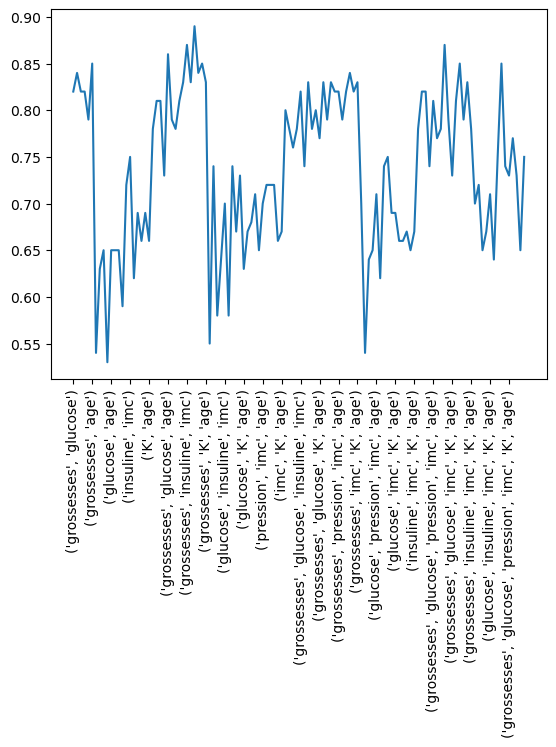

In [210]:
# plotting the accuracy for 120 sets 
plt.plot([str(i) for i in merged_col_combs], scores_combs)
plt.xticks(np.arange(0,120,step=5),rotation=90)
plt.show()

In [211]:
# getting max accuracy score, index and the best features combination
print("max accuracy score - %.2f , index - %.2s , the best features combination - %.40s" %
      (max(scores_combs), scores_combs.index(max(scores_combs)),merged_col_combs[scores_combs.index(max(scores_combs))]))

max accuracy score - 0.89 , index - 32 , the best features combination - ('grossesses', 'insuline', 'age')


In [212]:
# this time I'll utilize SelectKBest to define a set of features that contribute the most to the model
# 'grossesses','insuline','age' - the best set of features
ft = SelectKBest(f_classif, k=3).fit(X_train, Y_train)
print('Score: ', ft.scores_)
('Columns: ', list(X_train_cols))

Score:  [105.93262836   2.189281     2.37277734  39.02486159  29.03266206
  16.51109091  39.26825536]


('Columns: ',
 ['grossesses', 'glucose', 'pression', 'insuline', 'imc', 'K', 'age'])

In [213]:
# finally I'll utilize Hyperarameter Tuning in order to set the optimal set of parameters to maximize accuracy of the model
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train,Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [214]:
print("best_score - %.2f, best_params - %.80s " % 
      (g_res.best_score_,g_res.best_params_))

best_score - 0.83, best_params - {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'} 


In [215]:
# use the best HPT for the model
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train,Y_train)
Y_train_knn=knn.predict(X_train)
Y_test_knn=knn.predict(X_test)

In [216]:
print('Training set accuracy: ', metrics.accuracy_score(Y_train_knn,Y_train))
print('Test set accuracy: ', metrics.accuracy_score(Y_test_knn,Y_test))

Training set accuracy:  0.9
Test set accuracy:  0.78


In [217]:
print("______________________________________________")
print("confusion_matrix")
print(confusion_matrix(Y_test_knn,Y_test))
print("______________________________________________")
print("classification_report")
print(classification_report(Y_test_knn,Y_test))

______________________________________________
confusion_matrix
[[37  9]
 [13 41]]
______________________________________________
classification_report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        46
           1       0.82      0.76      0.79        54

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [ ]:
# Hyperarameter Tuning slightly improved accuracy for the trained dataset (from 0.89 to 0.9)
# the results of the model works worse for the test dataset